## Respuestas Miniproyecto 2

Utiliza este cuaderno como base para implementar las visualizaciones 

# A continuación se presenta el código referente al Caso 1

In [1]:
# importación de librerias necesarias para ejecución del código.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
# lectura y dar formato matricial al dataset.
dataset_videoconf = pd.read_csv("videoconferencia.csv").pivot(index="Día", columns="Semana", values="Horas")
dataset_videoconf

Semana,Semana 01,Semana 02,Semana 03,Semana 04,Semana 05,Semana 06,Semana 07,Semana 08,Semana 09,Semana 10,Semana 11,Semana 12
Día,,,,,,,,,,,,
Domingo,681186,1328314,1634848,1779600,1498611,2554450,2145738,2903559,3242449,4851753,4768308,7029848
Jueves,1873263,1623495,2497685,2966001,3090885,3902633,5245139,4355338,5944491,7277630,6993518,8592037
Lunes,1873263,2435243,2997222,2372801,3090885,4292896,4808044,4355338,6687552,9703507,7867708,12888056
Martes,908249,1475904,2179798,2372801,2247916,2270623,3814646,2815572,6484899,5292822,5086195,7029848
Miércoles,1717158,1826432,1998148,2669401,3777749,3122106,3933854,5807118,6687552,9703507,9616088,8592037
Sábado,851483,885542,1362373,1617818,1873263,1702967,2860984,2375639,4863674,4410685,3814646,4686565
Viernes,908249,1623495,1998148,1941382,2247916,2838278,3178872,3871412,5404082,5292822,7629293,8592037


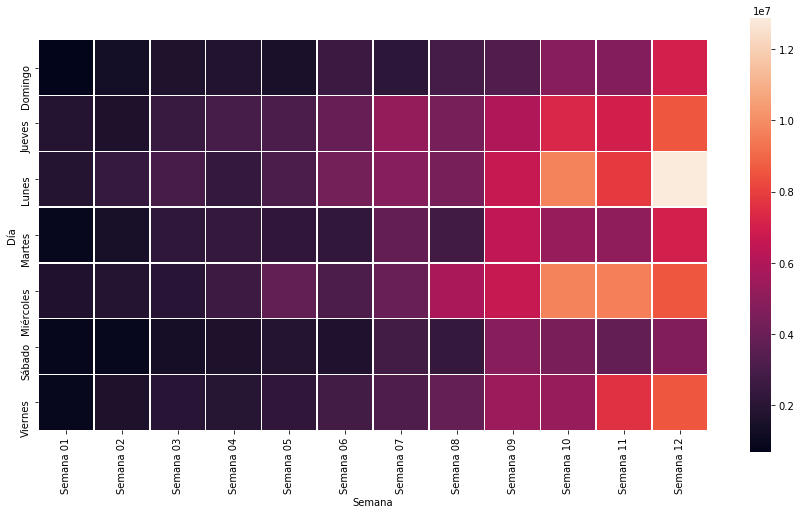

In [45]:
# Generación de heatmap básico.
plt.rcParams['figure.figsize'] = (15.0, 8.0)
ax = sns.heatmap(dataset_videoconf, linewidths=.5, square=True)

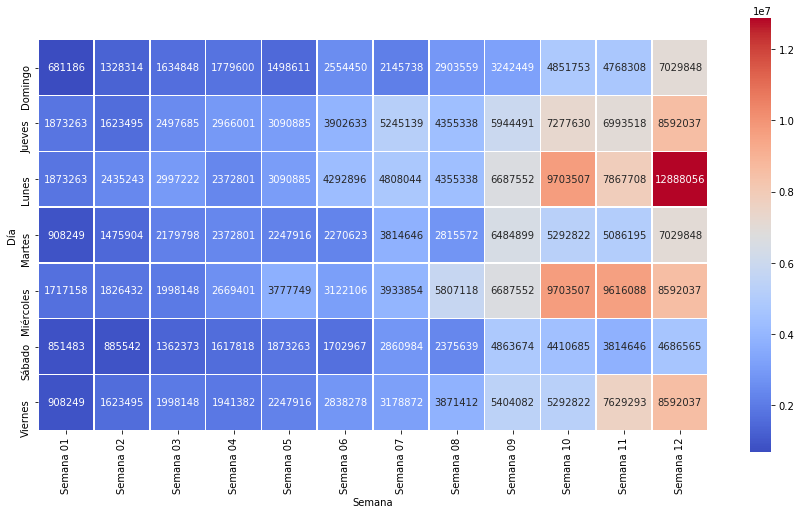

In [39]:
# Generación de heatmap con datos visualizados y cambio de estilo.
ax = sns.heatmap(dataset_videoconf, annot=True, fmt="d", annot_kws={'size':10}, cmap='coolwarm', linewidths=.5, square=True)

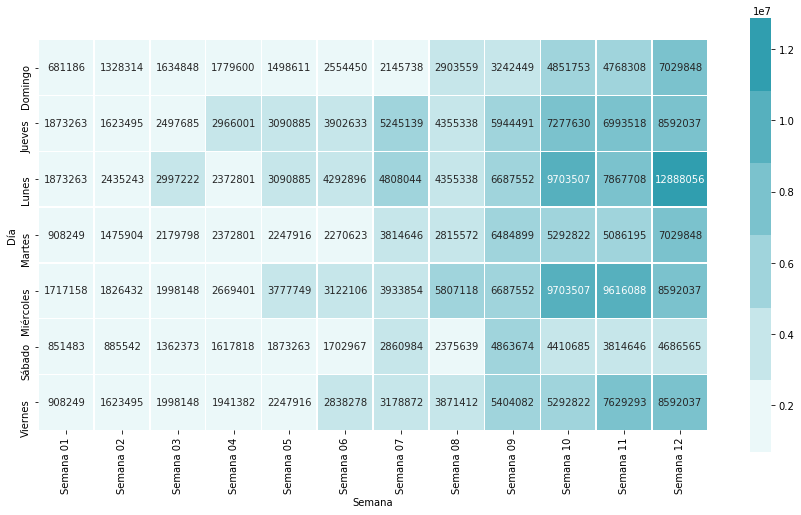

In [41]:
# Generación de heatmap con tipo de color secuencial.
ax = sns.heatmap(dataset_videoconf, annot=True, fmt="d", annot_kws={'size':10},
                 cmap=sns.light_palette((210, 90, 60), input="husl"), linewidths=.5, square=True)

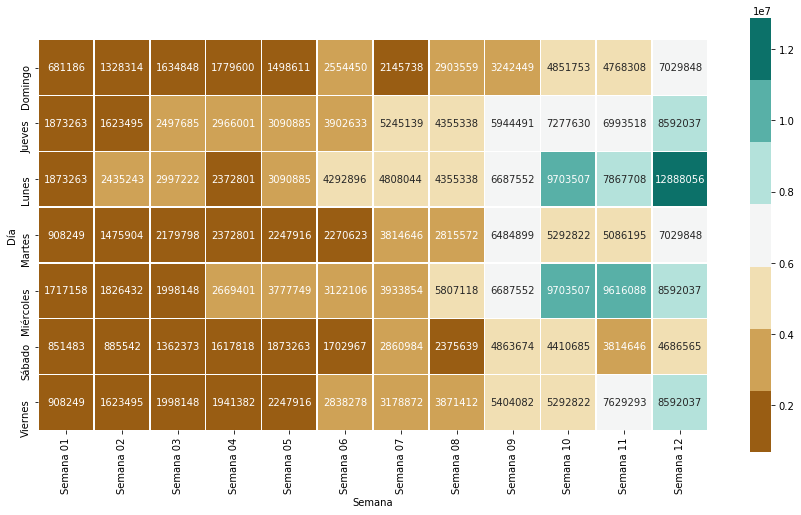

In [44]:
# Generación de heatmap con tipo de color divergente.
ax = sns.heatmap(dataset_videoconf, annot=True, fmt="d", annot_kws={'size':10},
                 cmap=sns.color_palette("BrBG", 7), linewidths=.5, square=True)

## Respuesta: En este caso, la paleta de color secuancial es más efectiva, ya que al primer golpe de vista me permite identificar la magnitud de los valores referentes a los respectivos ejes.

# A continuación se presenta el código referente al Caso 2.

In [60]:
# Importación de librerias necesarias para ejecución del código.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [53]:
# Carga del dataset a utilizar, además de la visualización de sus 5 primeras filas.
df_titanic = sns.load_dataset("titanic")
df_titanic.head(5)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [236]:
#Utilización de counts() para determinar cuantas personas pertenecian a cada clase, posteriormente dicha información
#se transforma a DataFrame para que funcione como entrada del primer gráfico de torta.
quantity_class = df_titanic.groupby(["class"]).count()
df1 = pd.DataFrame(quantity_class)
df1
df_class = pd.DataFrame(df1.iloc[:,[1]])
df_class

,pclass
class,
First,216
Second,184
Third,491


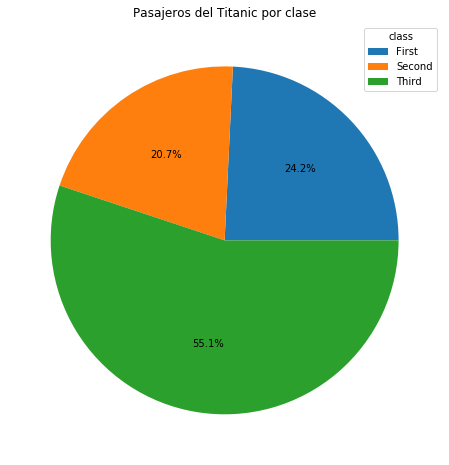

In [245]:
# Parámetros del gráfico de torta
fig = plt.figure(figsize=(8, 8))
labels = 'First', 'Second', 'Third'
plot = fig.add_subplot()
pie_plot = plot.pie(df_class["pclass"],autopct='%1.1f%%')
plot.legend(pie_plot[0], labels, title="class")
plot.set_title("Pasajeros del Titanic por clase")
plt.show()

In [170]:
# A través de la siguiente manipulación del dataset se define el DataFrame que contiene a los que no sobrevivieron por su clase
# respecctiva, diccho DataFrame funciona de entrada para el gráfico de torta que rpresenta esta infoemación.
d = df_titanic.groupby(["survived","class"]).count()
df1 = pd.DataFrame(d)
df1
df_notsurvived = pd.DataFrame(df1.iloc[0:3,0:1])
df_notsurvived


pclass
survived class         
0        First       80
         Second      97
         Third      372

In [169]:
# Se define el DataFrame que contiene a los sobrevivientes por su clase
# respecctiva, diccho DataFrame funciona de entrada para el gráfico de torta que rpresenta esta infoemación.
df_survived = pd.DataFrame(df1.iloc[3:6,0:1])
df_survived

pclass
survived class         
1        First      136
         Second      87
         Third      119

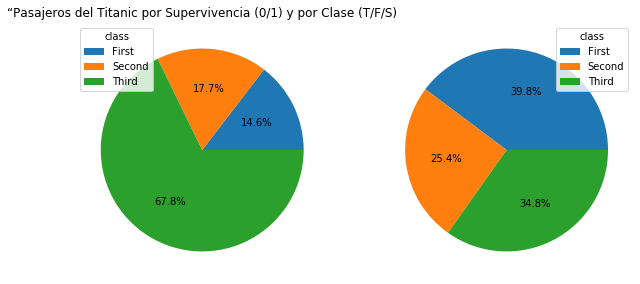

In [204]:
# Parámetros para ambos gráficos de torta.
fig = plt.figure(figsize=(10, 10))

labels = 'First', 'Second', 'Third'

plot = fig.add_subplot(121)
pie_plot = plot.pie(df_notsurvived["pclass"],autopct='%1.1f%%')
plot.legend(pie_plot[0], labels, title="class")
plot.set_title("Pasajeros del Titanic por Supervivencia (0/1) y por Clase (T/F/S)",loc='center')

plot = fig.add_subplot(122)
pie_plot = plot.pie(df_survived["pclass"],autopct='%1.1f%%')
plot.legend(pie_plot[0], labels, title="class")


plt.show()



## Respuestas: 
## a) De los sobrevivientes, la primera clase es la más común.
## b) De los no sobrevivientes, la tercera clase es la más común.
## c) Pienso que este tipo de gráfico no es más efectivo que un gráfico de barras para comparar categorias.

# A continuación se presenta el código referente al Caso 3.

In [206]:
# Importación de librerias necesarias para ejecución del código.
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [209]:
# Carga del dataset a utilizar, además de la visualización de sus 5 primeras filas.
df_pelis = pd.read_csv("peliculas.csv")
df_pelis.head(5)

,género,año,cantidad
0,acción,2010,11
1,acción,2011,14
2,acción,2012,22
3,acción,2013,11
4,acción,2014,12


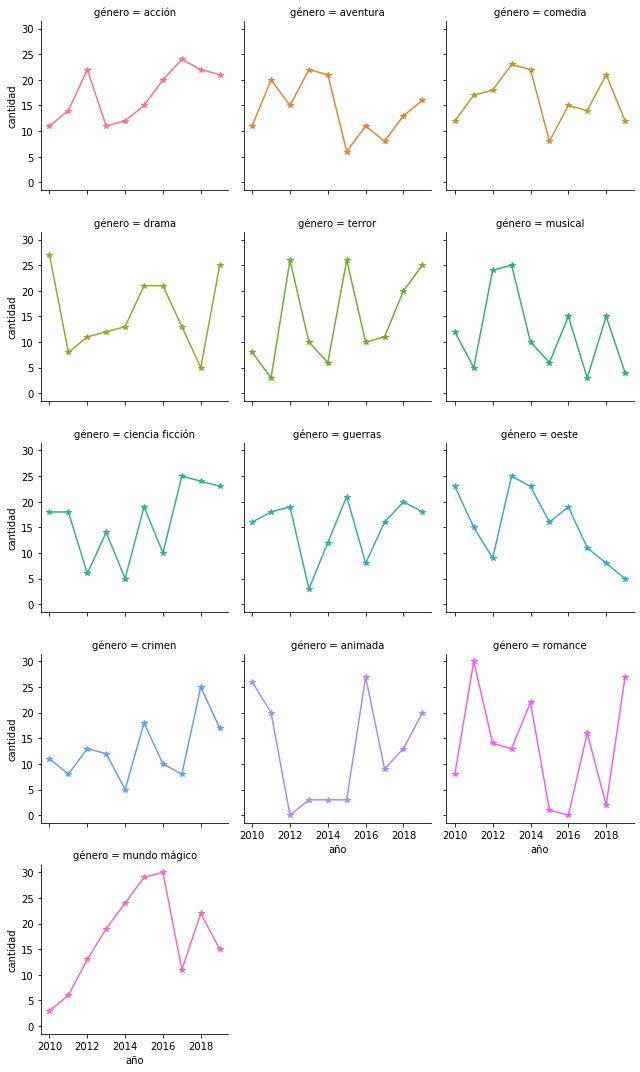

In [213]:
# Se ajustan los parámetros del dataset para este tipo de gráfica.
grid = sns.FacetGrid(data=df_pelis, col="género", hue="género", col_wrap=3)
grid.map(plt.plot, "año", "cantidad", marker="*")
plt.show()

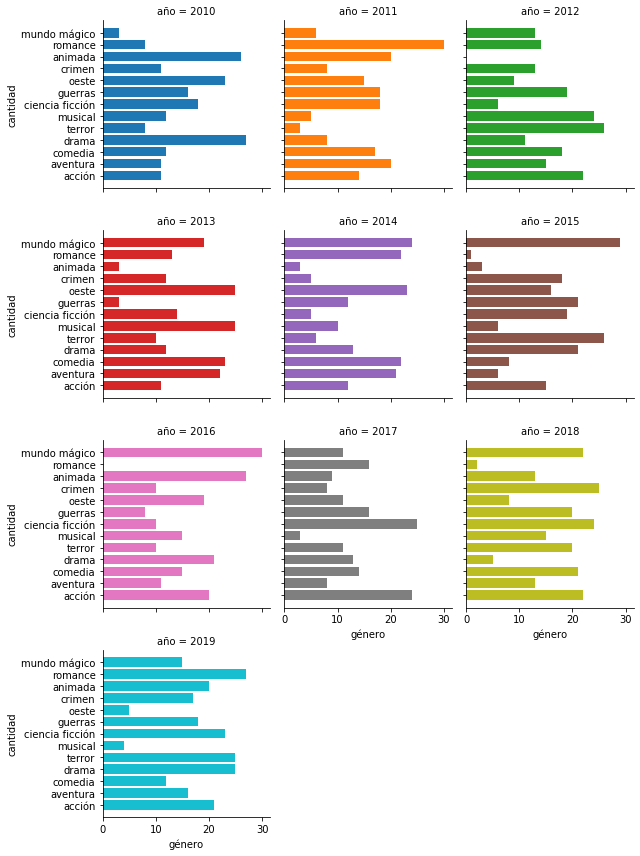

In [215]:
# Se ajustan los parámetros del dataset para este tipo de gráfica.
grid = sns.FacetGrid(data=df_pelis, col="año", hue="año", col_wrap=3)
grid.map(plt.barh , "género", "cantidad")
plt.show()

## Respuestas: 
## a) En los gráficos de linea se pueden apreciar mejor las tendencias de un género entre los diferentes años.
## b) En los gráficos de barra es posible identificar facilmente el género de películas más estrenados en un año específico.